In [4]:
import pip
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
market_value=pd.read_csv('C://datasets/club.csv')
market_value.head(5)

,Unnamed: 0,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
0,0,Manchester City,Premier League,24,27.1,970.02,40.42,920.70
1,1,Paris Saint-Germain,Ligue 1,36,26.1,891.18,24.76,801.00
2,2,Manchester United,Premier League,29,27.9,820.13,28.28,742.50
3,3,Chelsea FC,Premier League,27,26.9,802.35,29.72,737.10
4,4,Liverpool FC,Premier League,27,27.2,779.85,28.88,715.95


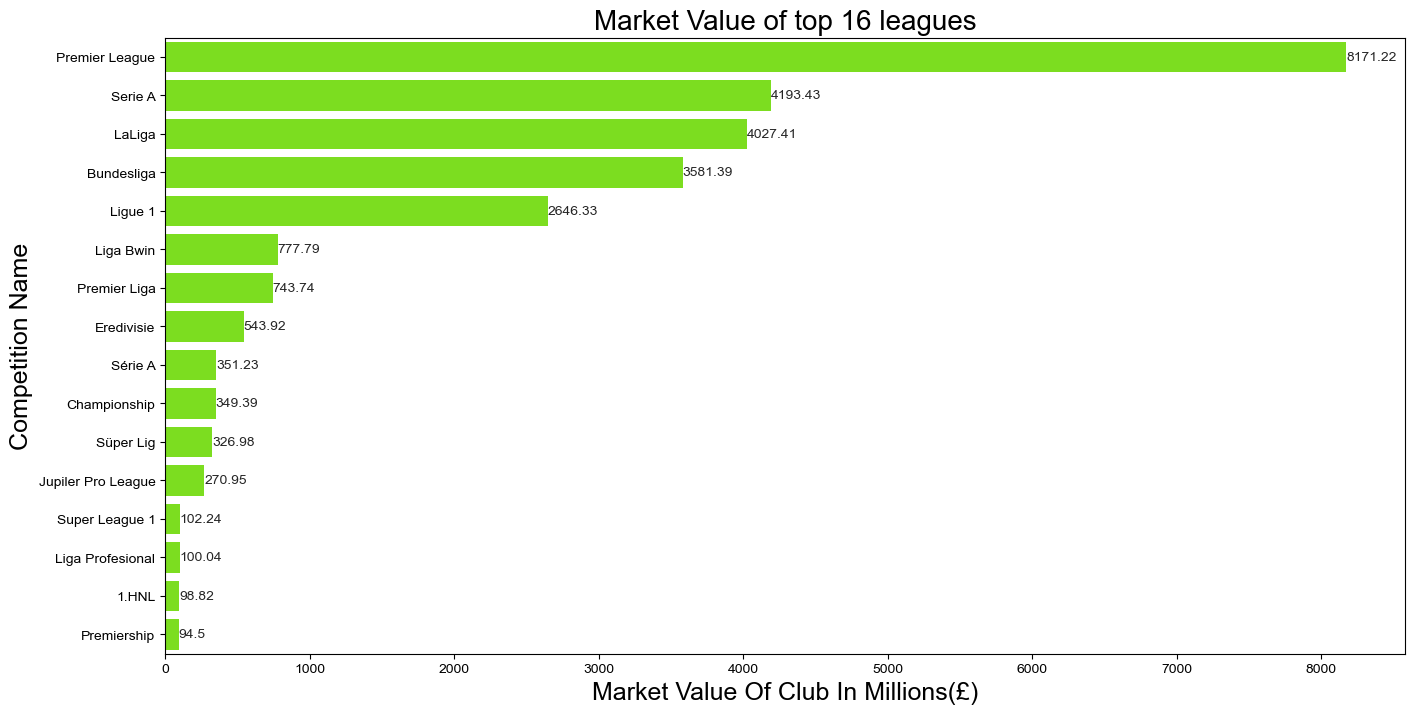

In [10]:
#Market Value of top 16 leagues
plot_order=market_value.groupby('Competition Name')['Market Value Of Club In Millions(£)'].sum().sort_values(ascending=False).index.values
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=market_value,y='Competition Name',x='Market Value Of Club In Millions(£)',errorbar=None,estimator=sum,order=plot_order,color='lawngreen').set_title('Market Value of top 16 leagues',fontsize=20)
sns.set_style("darkgrid")
ax.set_ylabel("Competition Name",fontsize=18)
ax.set_xlabel("Market Value Of Club In Millions(£)",fontsize=18)
for bars in ax.containers:
    ax.bar_label(bars)

In [12]:
#Pick Premier League teams from the dataframe, then categorize them by their locations
market_value_premier=market_value[market_value['Competition Name']=='Premier League']
is_in_london=['Not London','Not London','London','Not London','London','London','Not London','Not London','Not London','Not London',
              'London','Not London','Not London','Not London','London','Not London','London','Not London','Not London','Not London']
market_value_premier['London team']=is_in_london
market_value_premier

C:\Users\aiden\AppData\Local\Temp\ipykernel_19492\2758020848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_value_premier['London team']=is_in_london


,Unnamed: 0,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£),London team
0,0,Manchester City,Premier League,24,27.1,970.02,40.42,920.70,Not London
2,2,Manchester United,Premier League,29,27.9,820.13,28.28,742.50,Not London
3,3,Chelsea FC,Premier League,27,26.9,802.35,29.72,737.10,London
4,4,Liverpool FC,Premier League,27,27.2,779.85,28.88,715.95,Not London
8,8,Tottenham Hotspur,Premier League,24,25.6,627.30,26.14,558.00,London
12,12,Arsenal FC,Premier League,26,25.4,507.15,19.51,453.60,London
13,13,Leicester City,Premier League,28,27.1,493.29,17.62,447.30,Not London
19,19,Everton FC,Premier League,26,28.0,385.88,14.84,360.90,Not London
22,22,Aston Villa,Premier League,25,25.6,371.79,14.87,354.42,Not London
24,24,Wolverhampton Wanderers,Premier League,24,26.4,345.69,14.40,332.37,Not London


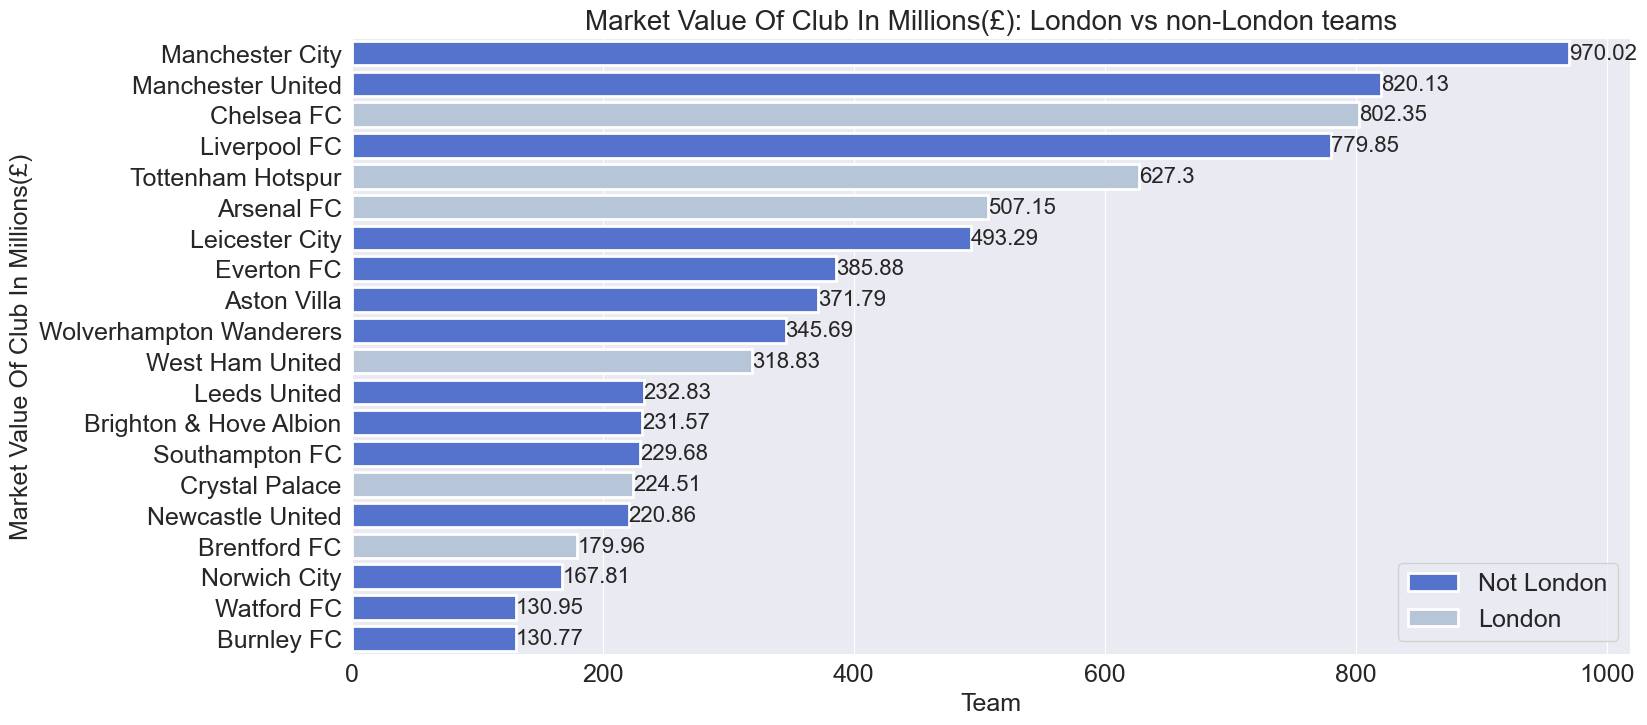

In [14]:
#Market Value Of Club In Millions(£): London vs non-London teams
fig,ax=plt.subplots(figsize=(16.5,8))
sns.barplot(data=market_value_premier,y='Club Name',x='Market Value Of Club In Millions(£)',hue='London team',palette=['royalblue','lightsteelblue'],linewidth=2)
ax.set_ylabel("Market Value Of Club In Millions(£)",fontsize=18)
ax.set_xlabel('Team',fontsize=18)
ax.set_title("Market Value Of Club In Millions(£): London vs non-London teams",fontsize=20)
ax.legend(fontsize=18)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
for bars in ax.containers:
    ax.bar_label(bars,fontsize=16)

Text(28, 23, 'Correlation:0.0257')

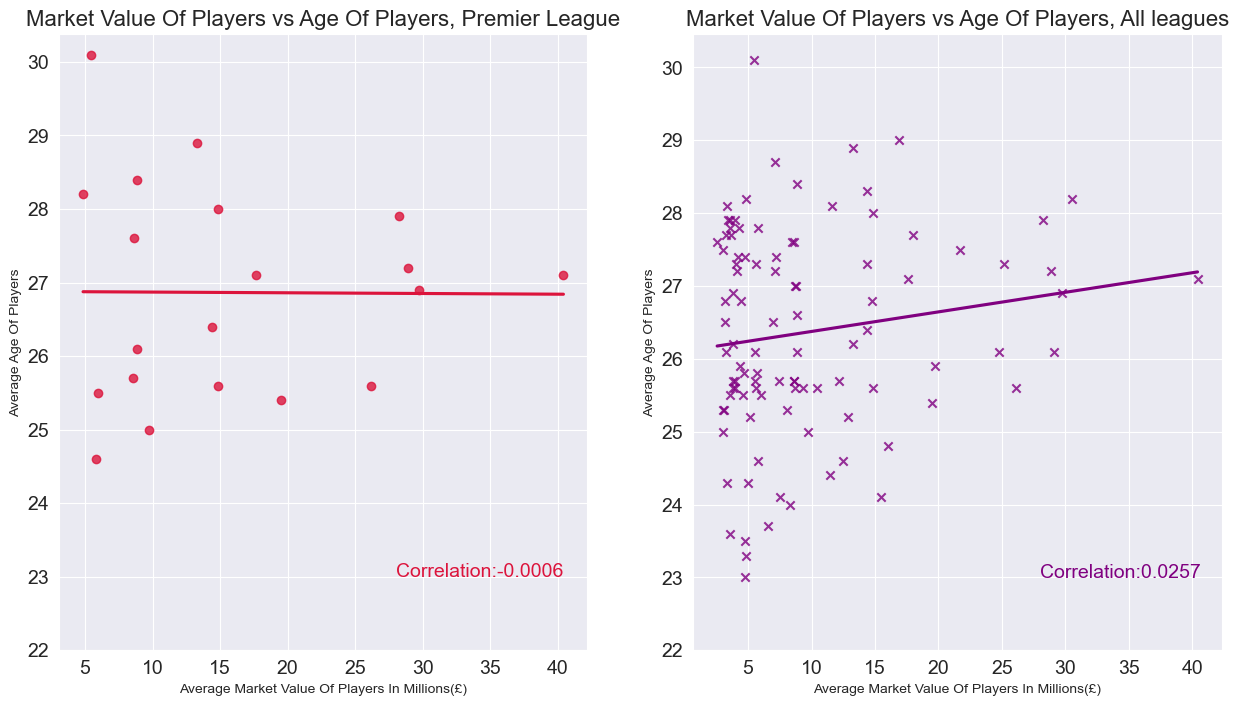

In [16]:
#Correlation between age of players and market value of PL teams vs that of teams from top leagues
fig,axes=plt.subplots(1,2,figsize=(15,8))
sns.regplot(data=market_value_premier, x="Average Market Value Of Players In Millions(£)", y="Average Age Of Players",color='crimson',ci=None,ax=axes[0])
axes[0].set_title("Market Value Of Players vs Age Of Players, Premier League",fontsize=16)
axes[0].set_yticks(np.arange(22,31,1))
axes[0].xaxis.set_tick_params(labelsize=14)
axes[0].yaxis.set_tick_params(labelsize=14)
axes[0].text(28, 23,'Correlation:-0.0006',fontsize=14,color='crimson')
sns.regplot(data=market_value, x="Average Market Value Of Players In Millions(£)", y="Average Age Of Players",color='purple',ci=None,marker='x',ax=axes[1])
axes[1].set_title("Market Value Of Players vs Age Of Players, All leagues",fontsize=16)
axes[1].set_yticks(np.arange(22,31,1))
axes[1].xaxis.set_tick_params(labelsize=14)
axes[1].yaxis.set_tick_params(labelsize=14)
axes[1].text(28, 23, 'Correlation:0.0257',fontsize=14,color='purple')

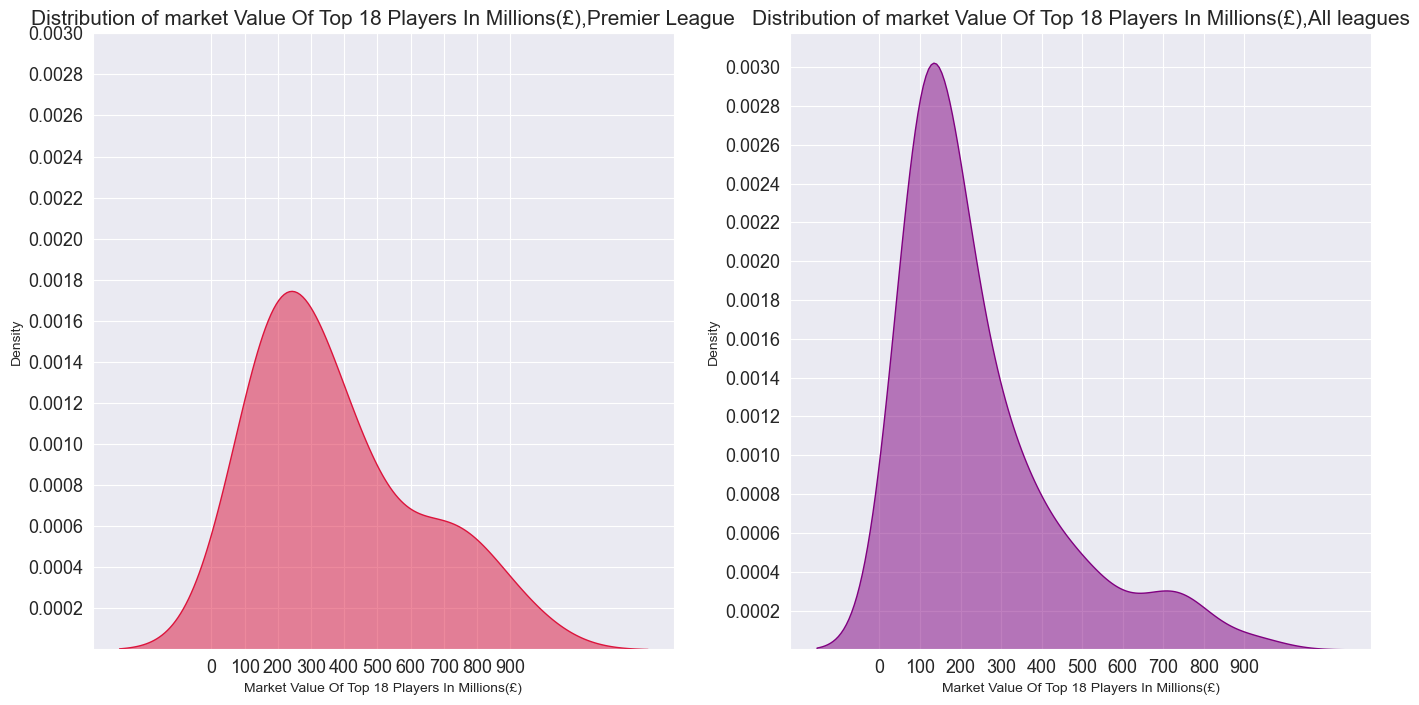

In [18]:
#Distribution of market value of top 18 players of PL and all leagues
fig,axes=plt.subplots(1,2,figsize=(16.5,8))
sns.kdeplot(data=market_value_premier, x="Market Value Of Top 18 Players In Millions(£)", bw_adjust=1, color='crimson',fill=True,alpha=.5,ax=axes[0])
axes[0].set_yticks(np.arange(0.0002,0.0032,0.0002))
axes[0].set_xticks(np.arange(0,1000,100))
axes[0].set_title("Distribution of market Value Of Top 18 Players In Millions(£),Premier League",fontsize=15)
axes[0].xaxis.set_tick_params(labelsize=13)
axes[0].yaxis.set_tick_params(labelsize=13)
sns.kdeplot(data=market_value, x="Market Value Of Top 18 Players In Millions(£)", bw_adjust=1, color='purple',fill=True,alpha=.5,ax=axes[1])
axes[1].set_yticks(np.arange(0.0002,0.0032,0.0002))
axes[1].set_xticks(np.arange(0,1000,100))
axes[1].set_title("Distribution of market Value Of Top 18 Players In Millions(£),All leagues",fontsize=15)
axes[1].xaxis.set_tick_params(labelsize=13)
axes[1].yaxis.set_tick_params(labelsize=13)

In [20]:
ratio_of_top_18_players=market_value['Market Value Of Top 18 Players In Millions(£)']/market_value['Market Value Of Club In Millions(£)']
market_value['ratio of top 18 players']=round(ratio_of_top_18_players,4)
sort_by_top_18=market_value.sort_values(by=['ratio of top 18 players'],ascending=False).head(10)
sort_by_top_18_asc=market_value.sort_values(by=['ratio of top 18 players']).head(10)
sort_by_top_18

,Unnamed: 0,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£),ratio of top 18 players
58,58,Zenit St. Petersburg,Premier Liga,22,27.2,156.33,7.11,154.17,0.9862
37,37,Leeds United,Premier League,24,25.0,232.83,9.70,228.15,0.9799
7,7,Atlético de Madrid,LaLiga,22,28.2,671.31,30.51,651.60,0.9706
70,70,Celta de Vigo,LaLiga,22,27.8,127.17,5.78,123.30,0.9696
27,27,West Ham United,Premier League,24,28.9,318.83,13.28,308.25,0.9668
76,76,Spartak Moscow,Premier Liga,24,25.8,112.86,4.70,108.90,0.9649
83,83,FK Krasnodar,Premier Liga,24,27.8,101.93,4.25,98.19,0.9633
14,14,Inter Milan,Serie A,28,29.0,473.31,16.90,455.85,0.9631
48,48,Stade Rennais FC,Ligue 1,28,23.7,182.75,6.53,175.95,0.9628
24,24,Wolverhampton Wanderers,Premier League,24,26.4,345.69,14.40,332.37,0.9615


In [22]:
sort_by_top_18_asc

,Unnamed: 0,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£),ratio of top 18 players
99,99,Genoa CFC,Serie A,34,27.6,86.94,2.56,72.27,0.8313
33,33,SL Benfica,Liga Bwin,29,27.0,252.90,8.72,215.10,0.8505
82,82,Olympiacos Piraeus,Super League 1,32,26.5,102.24,3.20,87.93,0.8600
97,97,Clube Atlético Mineiro,Série A,29,27.5,88.61,3.06,76.46,0.8629
50,50,TSG 1899 Hoffenheim,Bundesliga,33,25.7,182.05,5.52,157.32,0.8642
87,87,Galatasaray A.S.,Süper Lig,31,26.8,98.73,3.18,86.13,0.8724
63,63,Clube de Regatas do Flamengo,Série A,32,27.4,133.74,4.18,117.00,0.8748
94,94,FC Girondins Bordeaux,Ligue 1,30,25.3,89.55,2.99,78.75,0.8794
69,69,Sociedade Esportiva Palmeiras,Série A,31,27.2,128.88,4.16,113.36,0.8796
26,26,AS Monaco,Ligue 1,29,24.4,331.47,11.43,291.60,0.8797


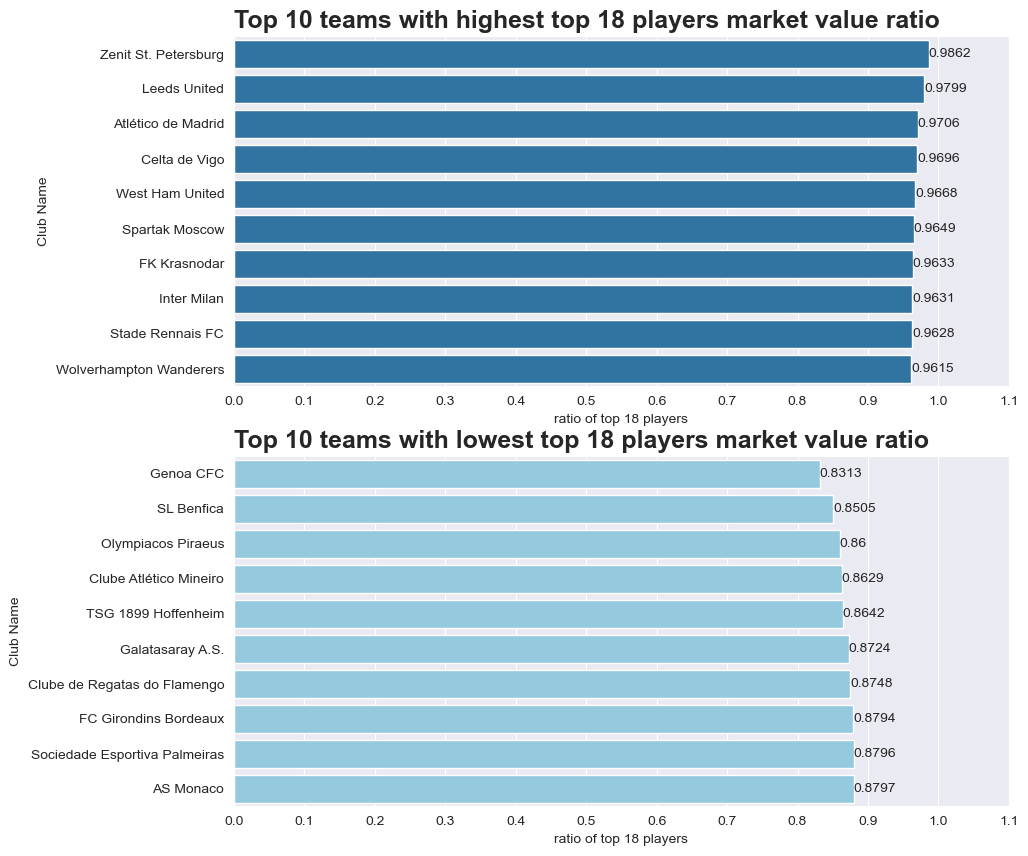

In [24]:
#top 10 teams with highest/lowest top 18 players amrket value ratio
fig,axes=plt.subplots(2,1,figsize=(10,10))
sns.barplot(data=sort_by_top_18,y='Club Name',x='ratio of top 18 players',ax=axes[0])
axes[0].set_xticks(np.arange(0,1.2,0.1))
axes[0].set_title('Top 10 teams with highest top 18 players market value ratio',
             loc ='left',fontsize=18,fontweight ='bold')
for bars in axes[0].containers:
    axes[0].bar_label(bars)
sns.barplot(data=sort_by_top_18_asc,y='Club Name',x='ratio of top 18 players',ax=axes[1],color='skyblue')
axes[1].set_xticks(np.arange(0,1.2,0.1))
axes[1].set_title('Top 10 teams with lowest top 18 players market value ratio',
             loc ='left',fontsize=18,fontweight ='bold')
for bars in axes[1].containers:
    axes[1].bar_label(bars)

In [26]:
#How many teams have the word City in its name?
count = market_value['Club Name'].str.count("City").sum()
count

3

In [28]:
#How many teams have the word United in its name?
count2 = market_value['Club Name'].str.count("United").sum()
count2

5

In [30]:
#How many teams have the word FC in its name?
count3 = market_value['Club Name'].str.count("FC").sum()
count3

21

In [32]:
#How many teams have the word de in its name?
count4 = market_value['Club Name'].str.count("de").sum()
count4

7

In [34]:
#What words are frequently present in football teams' names?
word={'Clubs contain':['FC','de','United','City'],'Number':[21,7,5,3]}
pd.DataFrame(data=word)

,Clubs contain,Number
0,FC,21
1,de,7
2,United,5
3,City,3


In [36]:
#Extract teams from top 4 leagues 
top_4_leagues=['Premier League','Bundesliga','Serie A','LaLiga']
avg_market_value_top4_leagues=market_value[market_value['Competition Name'].isin(top_4_leagues)]
top12_avg_value=avg_market_value_top4_leagues.sort_values(by='Average Market Value Of Players In Millions(£)',ascending=False).head(12)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Manchester City'),
  Text(1, 0, 'Atlético de Madrid'),
  Text(2, 0, 'Chelsea FC'),
  Text(3, 0, 'Bayern Munich'),
  Text(4, 0, 'Liverpool FC'),
  Text(5, 0, 'Manchester United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Real Madrid'),
  Text(8, 0, 'Juventus FC'),
  Text(9, 0, 'FC Barcelona'),
  Text(10, 0, 'Arsenal FC'),
  Text(11, 0, 'SSC Napoli')])

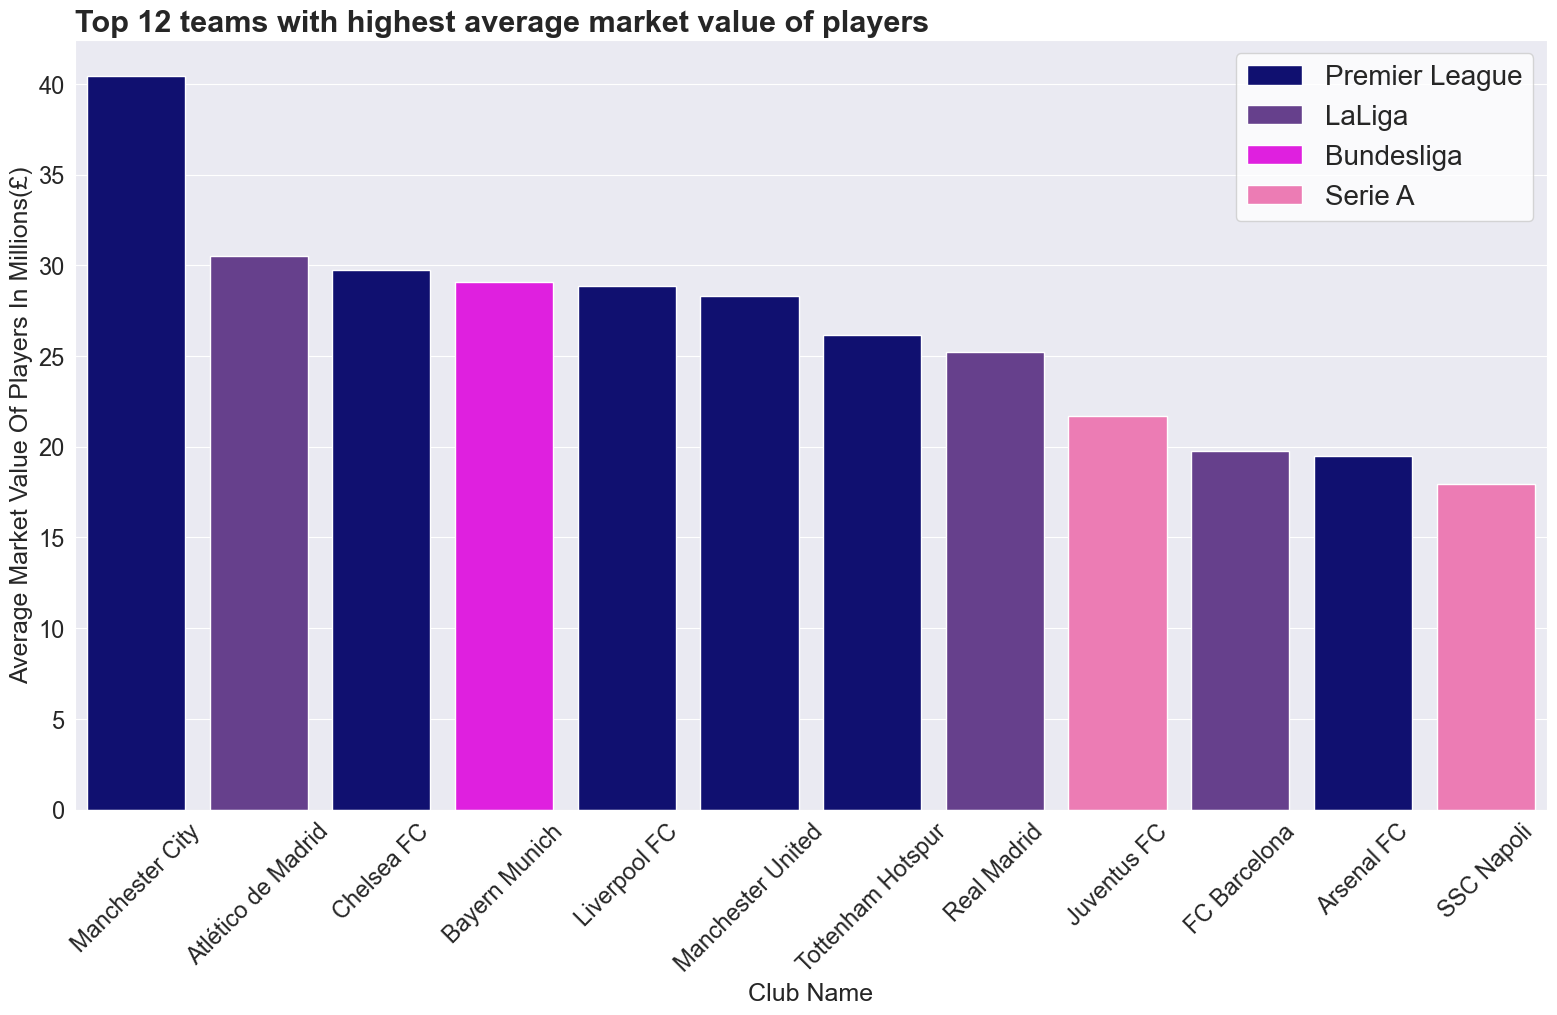

In [38]:
#top 12 teams with highest average market value of players in top 4 leagues
fig,ax=plt.subplots(figsize=(19,10))
sns.barplot(data=top12_avg_value,y='Average Market Value Of Players In Millions(£)',x='Club Name',hue='Competition Name'
           ,palette=['navy','rebeccapurple','fuchsia','hotpink'])
sns.set_style('white')
ax.set_title("Top 12 teams with highest average market value of players",fontsize=22,loc='left',fontweight ='bold')
ax.legend(fontsize=20)
ax.set_ylabel("Average Market Value Of Players In Millions(£)",fontsize=18)
ax.set_xlabel("Club Name",fontsize=18)
ax.xaxis.set_tick_params(labelsize=17)
ax.yaxis.set_tick_params(labelsize=17)
plt.xticks(rotation=45)

<Axes: xlabel='Competition Name', ylabel='Average Market Value Of Players In Millions(£)'>

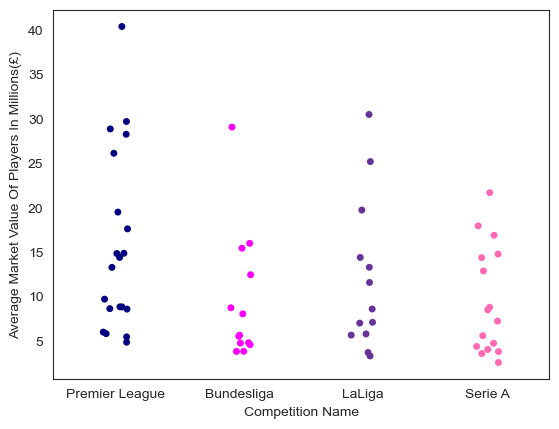

In [40]:
#distribution of average market value of players of top 4 leagues
sns.stripplot(data=avg_market_value_top4_leagues,x='Competition Name',y='Average Market Value Of Players In Millions(£)'
              ,hue='Competition Name',palette=['navy','fuchsia','rebeccapurple','hotpink'],jitter=True)

Text(0.5, 0, 'Squad Size')

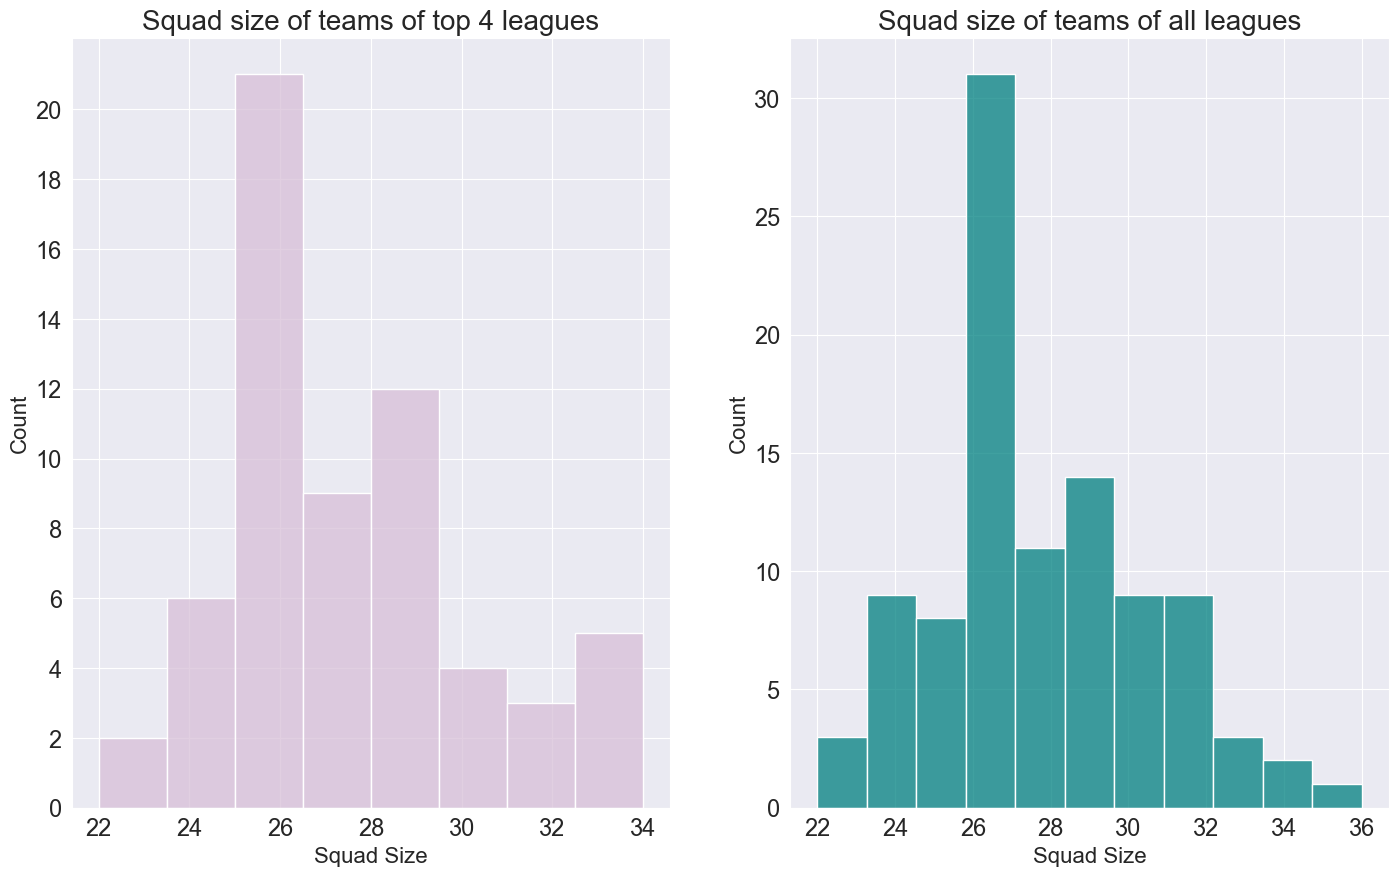

In [70]:
#Squad size of top 4 leagues teams vs all teams
sns.set_style('darkgrid')
fig,axes=plt.subplots(1,2,figsize=(17,10))
sns.histplot(data=avg_market_value_top4_leagues,x='Squad Size',color='thistle',ax=axes[0])
axes[0].set_yticks(np.arange(0,22,2))
axes[0].set_title('Squad size of teams of top 4 leagues',fontsize=20)
axes[0].xaxis.set_tick_params(labelsize=17)
axes[0].yaxis.set_tick_params(labelsize=17)
axes[0].set_ylabel("Count",fontsize=16)
axes[0].set_xlabel('Squad Size',fontsize=16)
sns.histplot(data=market_value,x='Squad Size',color='teal',ax=axes[1])
axes[1].set_title('Squad size of teams of all leagues',fontsize=20)
axes[1].set_yticks(np.arange(0,35,5))
axes[1].xaxis.set_tick_params(labelsize=17)
axes[1].yaxis.set_tick_params(labelsize=17)
axes[1].set_ylabel("Count",fontsize=16)
axes[1].set_xlabel('Squad Size',fontsize=16)

<Axes: xlabel='Competition Name', ylabel='Squad Size'>

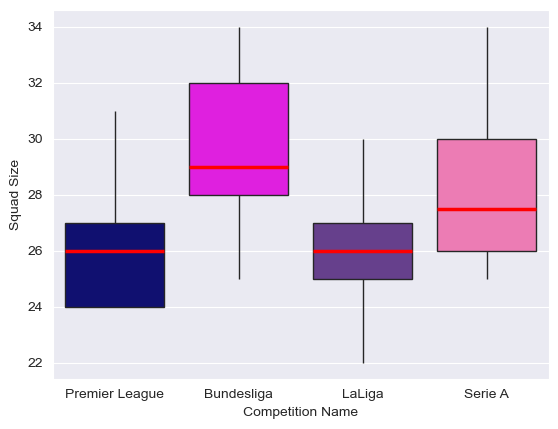

In [82]:
#Compare the squad sizes of top 4 leagues
sns.boxplot(data=avg_market_value_top4_leagues,x='Competition Name',y='Squad Size',
            hue='Competition Name',palette=['navy','fuchsia','rebeccapurple','hotpink'],showcaps=False
           ,medianprops={'color':'r','linewidth':2.5})